In [2]:
from scipy.sparse import random as sprand 
import numpy as np 
from quantum_newton_raphson.vqls_solve import VQLS_SOLVER

A = sprand(4,4, density=0.8, format='csr')
A = np.random.rand(4,4)
A = A+A.T
b = np.random.rand(4)

In [4]:
ref = np.linalg.solve(A,b)
ref

array([-1.34193508,  0.51817625,  2.35294941, -1.95280335])

In [6]:
from qiskit.primitives import Estimator 
from qiskit.circuit.library import RealAmplitudes 
from qiskit.algorithms.optimizers import ADAM, COBYLA

estimator = Estimator()
ansatz = RealAmplitudes(2)
optim = COBYLA()

/tmp/ipykernel_4124/3213876143.py:3: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import ADAM, COBYLA


In [9]:
quantum_solver_options = {'estimator':estimator, 'ansatz':ansatz, 'optimizer':optim}
solver = VQLS_SOLVER(estimator=estimator, ansatz=ansatz, optimizer=optim)

In [10]:
sol = solver(A, b)

/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


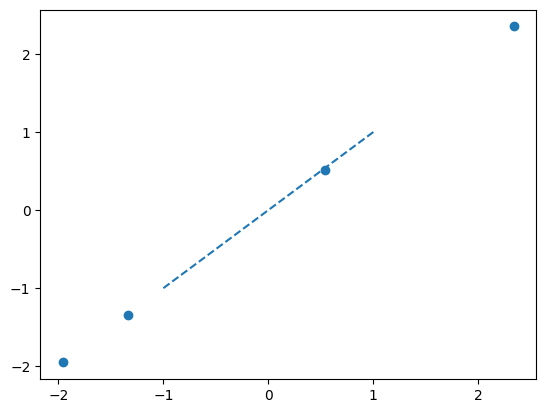

In [12]:
import matplotlib.pyplot as plt 
plt.plot([-1,1],[-1,1],'--')
plt.scatter(sol.solution, ref)